In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_10w_14d_8r_3s_10c_synt.json
1.	dc_AEC_1d_2c_1s_4r_4w.json
2.	dc_EEG_17d_8c_3s_5r_8w_RR.json
3.	dc_EEG_1d_1c_3s_2r_3w_RR.json
4.	dc_EEG_4d_3c_3s_2r_3w.json
5.	dc_EEG_8d_1c_3s_2r_3w_RR.json
6.	dc_EEG_8d_3c_3s_2r_3w.json
7.	dc_EEG_8d_3c_3s_2r_3w_RR.json
8.	dc_EEG_8d_3c_3s_2r_3w_demo_RR.json
9.	dc_EEG_8d_3c_3s_5r_3w_RR.json
10.	dc_EEG_8d_8c_3s_5r_8w_RR.json
11.	dc_dist_14d.json
12.	dc_dist_2d_3c_2s_3r_6w.json
13.	dc_fed_dist_14d.json
14.	dc_fed_dist_2d_3c_2s_3r_6w.json
15.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
16.	dc_synt_8d_8w_2c_4s_4r.json
17.	dc_synt_8d_8w_4c_6r_4s.json
18.	dc_synt_distributed_w5_c3_6r_3s_3d.json
19.	dc_test_synt_1d_2c_1s_4r_4w.json
20.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.json
4.	conn_1Router4Clients1S.json
5.	conn_1Router4Clients1fed.json
6.	conn_1Router4C

In [4]:
dc = 2
conn = 23
exp = 6
API.setJsons(dc , conn , exp)

In [5]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [6]:
exp_name = "EEG_Emotion_8Devices_3Persons_RR_full"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-07-31 18:57:53,160] 
Network components:
                 Receiver's Address: http://10.0.0.11:8901
                 Frequency: 5 [batches/sec]
                 Batchsize: 10 [samples]
                 devicesIp: ['10.0.0.11', '10.0.0.8', '10.0.0.12', '10.0.0.10', '10.0.0.32', '10.0.0.33', '10.0.0.34', '10.0.0.35', '10.0.0.47', '10.0.0.48', '10.0.0.49', '10.0.0.50', '10.0.0.51', '10.0.0.52', '10.0.0.53', '10.0.0.54', '10.0.0.55']
                 mainServerIp: 10.0.0.11
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.11
                 apiServerPort: 8901
                 Clients: ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']
                 Workers: ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8']
                 Sources: ['s1', 's2', 's3']
                 Routers: ['r1', 'r2', 'r3', 'r4', 'r5']
[INFO][2024-07-31 18:57:53,162] Connections:
[INFO][2024-07-31 18:57:53,163] 		 r1 : ['mainServer', 'c1', 'c2', 'r2']
[INFO][2024-07-31 18:57:53,1

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-07-31 18:57:55,203] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Connections:  [('r1', ['mainServer', 'c1', 'c2', 'r2']), ('r2', ['c3', 'c4', 's1', 'r3']), ('r3', ['c5', 'c6', 'r4', 'r1']), ('r4', ['s2', 'c7', 'r5', 'r2']), ('r5', ['s3', 'c8', 'r1'])]
Routers:  ['r1', 'r2', 'r3', 'r4', 'r5']
Workers:  ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8']
Adding edge (r1 , mainServer) to graph
Adding edge (r1 , c1) to graph
Adding edge (r1 , c2) to graph
Adding edge (r1 , r2) to graph
Adding edge (r2 , c3) to graph
Adding edge (r2 , c4) to graph
Adding edge (r2 , s1) to graph
Adding edge (r2 , r3) to graph
Adding edge (r3 , c5) to graph
Adding edge (r3 , c6) to graph
Adding edge (r3 , r4) to graph
Adding edge (r3 , r1) to graph
Adding edge (r4 , s2) to graph
Adding edge (r4 , c7) to graph
Adding edge (r4 , r5) to graph
Adding edge (r4 , r2) to graph
Adding edge (r5 , s3) to graph
A

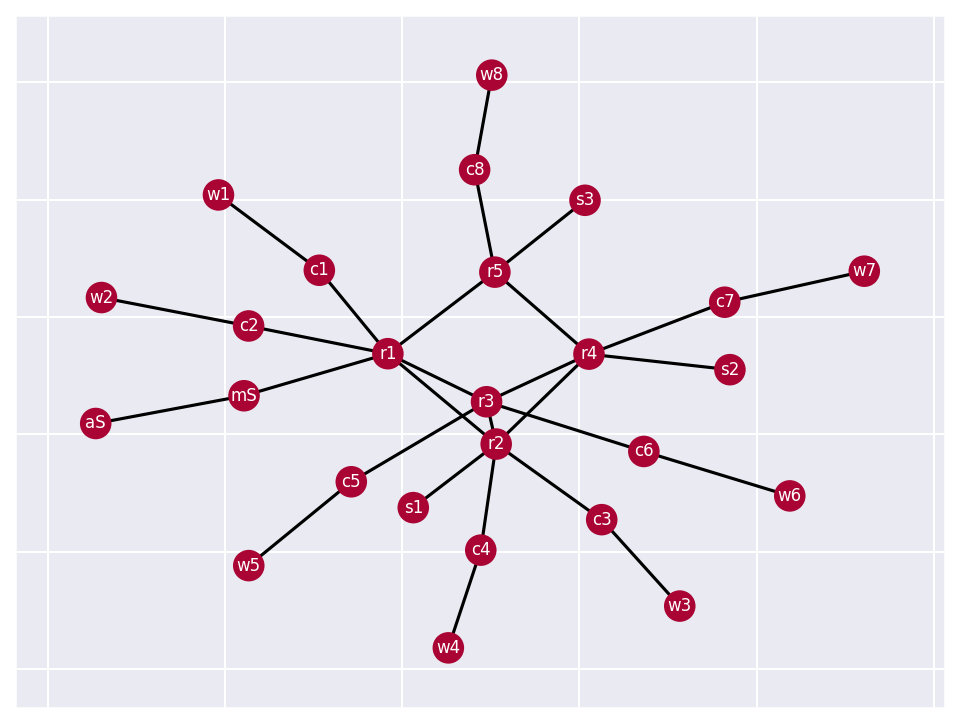

In [7]:
%pip install networkx pygraphviz
import networkx as nx
def visualize_nerlnet_graph(api_server_inst,  connections : dict , components): # connections is a dictionary with keys as routers and values as lists of their neighbors
    print("Connections: " , list(connections.items()))
    routers = list(connections.keys())
    print("Routers: " , routers)
    workers = list(components.map_worker_to_client.keys())
    print("Workers: " , workers)
    graph = nx.Graph()
    nodes = routers + components.sources + components.clients + workers + [API_SERVER_STR , MAIN_SERVER_STR]
    edges = [] # list of tuples
    for router , neighbors in list(connections.items()):
        for neighbor in neighbors:
            if (router,neighbor) not in edges:
                print(f"Adding edge ({router} , {neighbor}) to graph")
                edges.append((router , neighbor))
    edges.append((API_SERVER_STR , MAIN_SERVER_STR)) # Always connected
    for worker in workers:
        edges.append((worker , components.map_worker_to_client[worker]))
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    
    my_labels = {'mainServer': 'mS' , 'apiServer': 'aS'}
    nx.relabel_nodes(graph, my_labels , copy=False)
    
    default_colors = {node:'#A90433' for node in graph.nodes()}
    node_colors = {node:default_colors[node] for node in graph.nodes()}
    nx.set_node_attributes(graph, node_colors, 'color')
    colors = nx.get_node_attributes(graph, 'color').values()

    pos = nx.nx_agraph.graphviz_layout(graph)
    angle = 100
    
    plt.figure(figsize=(8,6),dpi=150)
    nx.draw_networkx(graph, pos, with_labels=True, node_color=colors , node_size=200, font_size=8, font_color='white' , edge_color='black' , width=1.5)
    plt.show()
visualize_nerlnet_graph(API , API.json_dir_parser.json_from_path(conn_path)['connectionsMap'] , globe.components)

In [8]:
API.send_jsons_to_devices()

[INFO][2024-07-31 18:57:58,451] Sending distributed configurations to devices is completed


In [9]:
API.run_current_experiment_phase()

[INFO][2024-07-31 18:57:58,458] Experiment phase: training_phase of type training starts running...
[INFO][2024-07-31 18:57:58,459] Sending data to sources
[INFO][2024-07-31 18:58:53,645] Data is ready in sources
[INFO][2024-07-31 18:58:53,850] Phase training requested from Main Server
[INFO][2024-07-31 19:03:27,040] Processing experiment phase data
[INFO][2024-07-31 19:03:33,266] Processing experiment phase data completed
[INFO][2024-07-31 19:03:33,267] Start generating communication statistics for training_phase of type training
[INFO][2024-07-31 19:03:33,268] Statistics requested from Main Server
[INFO][2024-07-31 19:03:33,372] Statistics received from Main Server
[INFO][2024-07-31 19:03:33,373] Phase of training_phase training completed


In [10]:
stats_train = API.get_experiment_flow(exp_name).generate_stats()

In [11]:
missed_dict = stats_train.get_missed_batches()

,w5,w8,w6,w2,w3,w4,w1,w7
0,0.544444,0.533333,0.666667,0.444444,0.666667,0.511111,0.477778,0.388889
1,0.444444,0.444444,0.555556,0.444444,0.633333,0.422222,0.333333,0.555556
2,0.444444,0.444444,0.555556,0.444444,0.555556,0.522222,0.511111,0.444444
3,0.444444,0.411111,0.555556,0.444444,0.555556,0.444444,0.422222,0.433333
4,0.400000,0.444444,0.622222,0.444444,0.611111,0.522222,0.555556,0.644444
...,...,...,...,...,...,...,...,...
775,NaN,NaN,0.085313,NaN,0.089130,NaN,NaN,NaN
776,NaN,NaN,0.083992,NaN,0.087848,NaN,NaN,NaN
777,NaN,NaN,0.082648,NaN,0.086575,NaN,NaN,NaN
778,NaN,NaN,NaN,NaN,0.085301,NaN,NaN,NaN


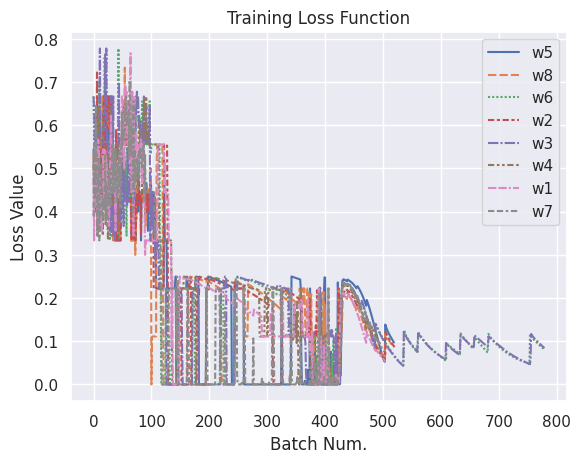

In [12]:
stats_train.get_loss_ts(plot=True)

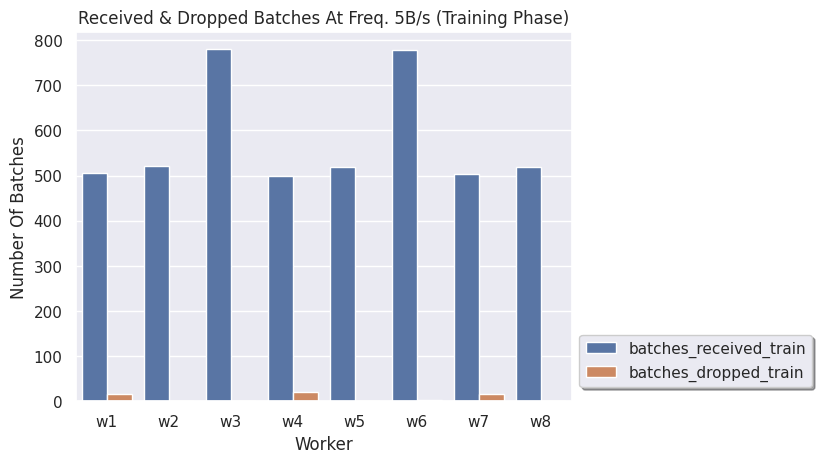

In [13]:
import pandas as pd
workers_comm_dict = stats_train.get_communication_stats_workers()
df_train = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_train = df_train.iloc[[3,5]]
data_train = pd.melt(df_selected_train.reset_index(), id_vars=['index'], value_vars=df_train.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_train)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 5B/s (Training Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()


In [14]:
print(missed_dict)

{'phase:training_phase,s1->w4': [1417, 1423, 1429, 1438, 1444, 1453, 1459, 1465, 1471, 1477, 1483, 1489, 1498, 1504, 1513, 1525, 1531, 1537, 1546, 1549, 1558], 'phase:training_phase,s1->w1': [1107, 1113, 1221, 1227, 1233, 1239, 1245, 1251, 1257, 1263, 1272, 1305, 1311, 1317, 1323, 1344], 'phase:training_phase,s1->w7': [1403, 1409, 1415, 1418, 1427, 1433, 1439, 1445, 1451, 1457, 1463, 1469, 1475, 1481, 1490, 1502, 1517], 'phase:training_phase,s3->w6': [1291, 1447], 'phase:training_phase,s3->w3': [904]}
